# Loading Dataset for developing Model

In [80]:
import pandas as pd
df = pd.read_csv('cust_seg_model1.csv')
df.sample(12)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Month
112006,550914,21668,12,1.25,17061.0,36,4
369070,580730,22941,4,16.63,NaN,36,12
74437,545899,20718,2,1.25,17817.0,36,3
329720,576617,22556,2,3.29,NaN,36,11
105067,550052,21935,10,1.65,17068.0,36,4
292867,572719,22507,4,4.95,13871.0,36,10
177209,559680,23155,12,0.83,12717.0,15,7
293079,572738,21810,48,0.39,14234.0,36,10
307362,574317,21106,24,2.55,17078.0,36,11
133633,553859,21865,2,2.10,14505.0,36,5


In [81]:
df = df.dropna()
df.isnull().sum()

InvoiceNo     0
StockCode     0
Quantity      0
UnitPrice     0
CustomerID    0
Country       0
Month         0
dtype: int64

## Encoding Categorical Features

In [82]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

le = LabelEncoder()
categories = ['InvoiceNo','StockCode','CustomerID']
for category in categories:
        df[category] = le.fit_transform(df[category].astype(str))
        
df.sample(12) 

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Month
157577,8007,1432,2,8.50,1869,10,6
5549,347,1538,3,1.65,3529,36,12
213435,10769,847,10,1.65,3497,36,8
92820,4466,1480,10,1.25,1210,36,3
271176,13398,1431,3,5.95,2383,36,10
174008,8833,1931,24,0.83,99,14,7
260062,12886,3066,12,1.25,1349,36,10
311144,15137,2742,6,2.10,3937,36,11
56973,2696,537,12,0.85,105,14,2
218843,11050,1750,3,2.10,592,36,8


In [83]:
df.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Month
count,319916.000000,319916.000000,319916.000000,319916.000000,319916.000000,319916.000000,319916.000000
mean,9388.885723,1519.633176,13.583791,2.621244,2080.197186,33.367603,7.514985
std,5179.396825,810.512624,25.763407,2.537302,1238.565758,7.506392,3.402398
min,0.000000,0.000000,2.000000,0.220000,0.000000,0.000000,1.000000
25%,4816.000000,906.000000,3.000000,1.250000,1045.000000,36.000000,5.000000
50%,9733.000000,1493.000000,6.000000,1.650000,1965.000000,36.000000,8.000000
75%,13855.000000,2047.000000,12.000000,2.950000,3177.000000,36.000000,11.000000
max,18095.000000,3498.000000,448.000000,25.000000,4305.000000,37.000000,12.000000


## Removing customers with more than one country

In [84]:
customer_country_check = df.groupby('CustomerID')['Country'].nunique()
customers_with_multiple_countries = customer_country_check[customer_country_check > 1].index
df = df[~df['CustomerID'].isin(customers_with_multiple_countries)]
df.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Month
count,319057.000000,319057.000000,319057.000000,319057.00000,319057.000000,319057.000000,319057.000000
mean,9394.579871,1519.706074,13.583284,2.61915,2085.638080,33.434919,7.516541
std,5178.917243,810.375969,25.765080,2.53518,1235.778644,7.381893,3.401750
min,0.000000,0.000000,2.000000,0.22000,0.000000,0.000000,1.000000
25%,4823.000000,907.000000,3.000000,1.25000,1053.000000,36.000000,5.000000
50%,9740.000000,1493.000000,6.000000,1.65000,1971.000000,36.000000,8.000000
75%,13861.000000,2047.000000,12.000000,2.95000,3179.000000,36.000000,11.000000
max,18095.000000,3498.000000,448.000000,25.00000,4305.000000,37.000000,12.000000


## Feature Engineering

In [140]:
df.shape

(319057, 8)

In [141]:
df.loc[:, 'Amount'] = df['Quantity'] * df['UnitPrice']
df.sample(10)

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Month,Amount
44247,2037,333,24,1.25,225,14,1,30.00
307131,14969,1433,2,8.50,3722,36,11,17.00
149020,7543,150,2,7.95,2482,36,6,15.90
218472,11030,2088,12,1.65,272,13,8,19.80
35247,1709,2618,2,4.25,1334,36,1,8.50
211769,10668,1694,2,1.65,1729,36,8,3.30
162526,8280,2015,6,4.15,302,14,6,24.90
314014,15269,993,2,4.95,4017,36,11,9.90
247308,12321,1698,6,2.95,726,36,9,17.70
316973,15411,2107,6,2.08,423,36,11,12.48


## Restructuring Dataset for Building Model

In [142]:
df_amt = df.groupby('CustomerID')['Amount'].sum().reset_index()
df_amt.sample(10)

,CustomerID,Amount
3322,3330,103.91
3745,3753,723.21
3492,3500,2436.45
1026,1034,741.26
2457,2465,4213.68
1022,1030,935.50
2237,2245,97.70
2046,2054,286.75
2769,2777,1824.23
3952,3960,1150.71


In [143]:
df_fq = df.groupby('CustomerID')['InvoiceNo'].sum().reset_index()
df_fq.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
df_fq.sample(10)

,CustomerID,Frequency
3915,3923,10635
4161,4169,161040
2941,2949,579135
2610,2618,92351
3921,3929,3898173
1839,1847,547579
3535,3543,370126
1876,1884,28040
155,163,1554797
3340,3348,111195


In [144]:
df_new = df_amt.merge(df_fq, on='CustomerID')
df_new.sample(10)

,CustomerID,Amount,Frequency
1396,1404,453.63,256598
559,567,6408.71,1987102
4025,4033,88.07,162840
3677,3685,100.80,25410
2417,2425,386.43,238170
3318,3326,349.31,771639
1615,1623,1061.69,678274
2837,2845,3467.25,3391946
3804,3812,144.72,122800
2639,2647,2398.86,359114


In [145]:
df_new.shape

(4298, 3)

In [146]:
df_count = df[['CustomerID', 'Country']]
df_new = df_new.merge(df_count, on='CustomerID')
df_new.sample(10)

,CustomerID,Amount,Frequency,Country
272487,3647,3851.41,3541220,36
120561,1575,1429.68,3353046,36
106222,1376,3321.06,1255030,36
32454,389,1626.12,621418,36
98615,1294,2904.20,1478077,36
2054,29,1436.56,926646,25
1190,14,5042.56,2944063,3
6288,85,8912.33,2925927,33
184862,2344,4348.38,7039325,36
199365,2560,313.84,202720,36


In [147]:
df_new = df_new.drop_duplicates(subset=['CustomerID'])
df_new

,CustomerID,Amount,Frequency,Country
0,0,4310.00,1438418,17
182,1,1437.24,73150,12
209,2,1392.35,1134153,19
278,3,294.40,38912,25
294,4,1385.74,692790,25
...,...,...,...,...
318614,4301,180.60,35160,36
318624,4302,46.92,38680,36
318629,4303,152.55,138005,36
318639,4304,1364.92,4390609,36


## Removing Outliers (Z-Score Method)

In [148]:
from scipy import stats
z_scores_column1 = stats.zscore(df_new['Amount'])
z_scores_column2 = stats.zscore(df_new['Frequency'])
df_new = df_new[(abs(z_scores_column1) < 3) & (abs(z_scores_column2) < 3)]
df_new

,CustomerID,Amount,Frequency,Country
0,0,4310.00,1438418,17
182,1,1437.24,73150,12
209,2,1392.35,1134153,19
278,3,294.40,38912,25
294,4,1385.74,692790,25
...,...,...,...,...
318614,4301,180.60,35160,36
318624,4302,46.92,38680,36
318629,4303,152.55,138005,36
318639,4304,1364.92,4390609,36


## Rescaling the Attributes

In [149]:
scaler = StandardScaler()
df_new.loc[:, ['Amount', 'Frequency', 'Country']] = scaler.fit_transform(df_new[['Amount', 'Frequency', 'Country']])
df_new = df_new.drop('CustomerID', axis=1)
df_new

,Amount,Frequency,Country
0,1.507043,1.082986,-2.733911
182,0.072228,-0.675641,-3.529420
209,0.049808,0.691057,-2.415707
278,-0.498569,-0.719743,-1.461096
294,0.046506,0.122529,-1.461096
...,...,...,...
318614,-0.555407,-0.724576,0.289024
318624,-0.622174,-0.720042,0.289024
318629,-0.569417,-0.592100,0.289024
318639,0.036107,4.885758,0.289024


## Building Models

### K Means Clustering

In [185]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

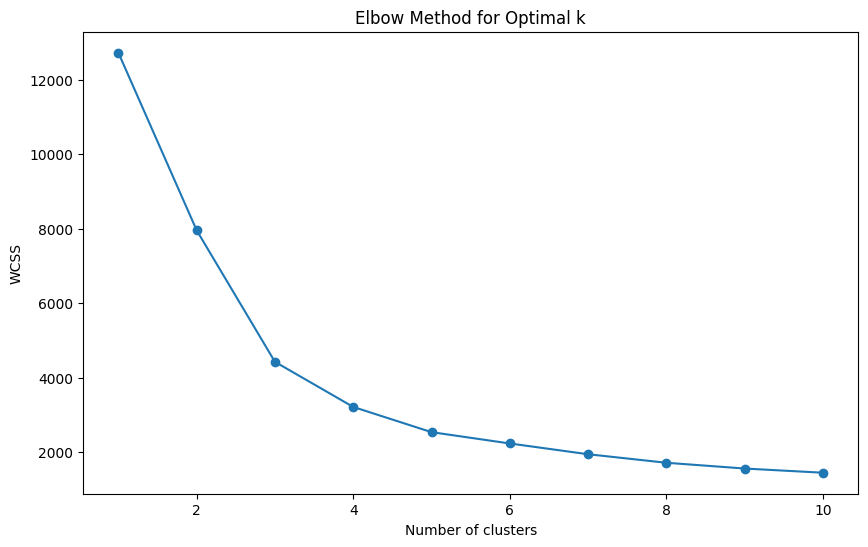

In [186]:
X = df_new[['Amount', 'Frequency', 'Country']].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [187]:
for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    print(f"For n_clusters = {k}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 3, the average silhouette score is: 0.7136296451394236
For n_clusters = 4, the average silhouette score is: 0.6235652722763856


**By K Means Clustering , no. of clusters = 3 with the average silhouette score : 0.7136296451394236**

Silhouette Score: 0.71


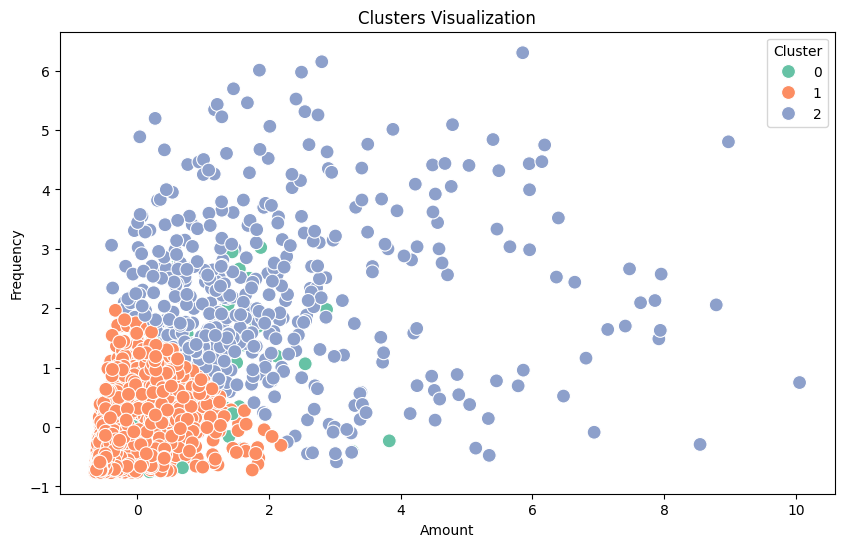

Cluster Centers:
[[ 0.05377242 -0.05747794 -3.55281715]
 [-0.26734048 -0.27799682  0.26379529]
 [ 2.05353673  2.20378003  0.08441384]]
           Amount  Frequency   Country  Cluster KMeans  Cluster HC
Cluster                                                           
0        0.053772  -0.057478 -3.552817             0.0    2.000000
1       -0.267340  -0.277997  0.263795             1.0    0.025291
2        2.053537   2.203780  0.084414             2.0    0.815965


In [188]:
k = 3  # Optimal number of clusters

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_new['Cluster'] = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, df_new['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_new['Amount'], y=df_new['Frequency'], hue=df_new['Cluster'], palette='Set2', s=100)
plt.title('Clusters Visualization')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

print('Cluster Centers:')
print(kmeans.cluster_centers_)

cluster_summary = df_new.groupby('Cluster').mean()
print(cluster_summary)

### Hierarchical Clustering

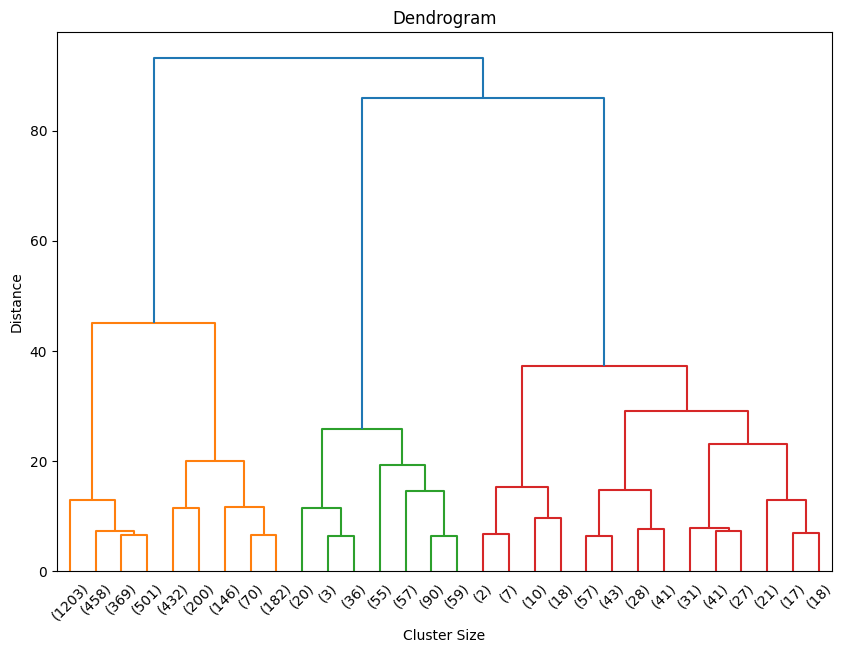

In [194]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [197]:
n_clusters = 3  # Number of clusters you decide based on the dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agg_clustering.fit_predict(X)
df_new['Cluster'] = clusters
df_new

,Amount,Frequency,Country,Cluster,Cluster KMeans,Cluster HC
0,1.507043,1.082986,-2.733911,2,0,2
182,0.072228,-0.675641,-3.529420,2,0,2
209,0.049808,0.691057,-2.415707,2,0,2
278,-0.498569,-0.719743,-1.461096,2,1,2
294,0.046506,0.122529,-1.461096,2,1,2
...,...,...,...,...,...,...
318614,-0.555407,-0.724576,0.289024,0,1,0
318624,-0.622174,-0.720042,0.289024,0,1,0
318629,-0.569417,-0.592100,0.289024,0,1,0
318639,0.036107,4.885758,0.289024,1,2,1


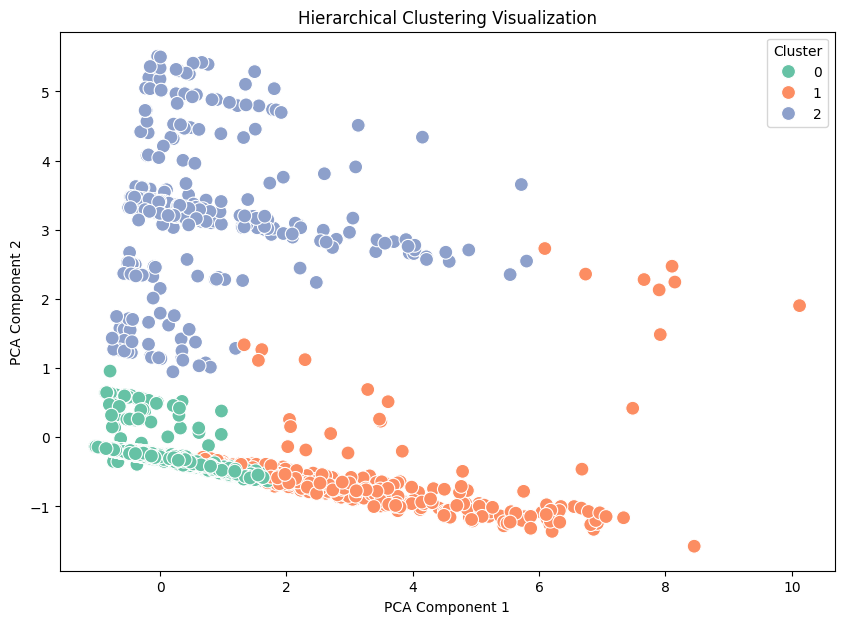

In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_new['Cluster'], palette='Set2', s=100)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [199]:
cluster_summary = df_new.groupby('Cluster').mean()
print(cluster_summary)

           Amount  Frequency   Country  Cluster KMeans  Cluster HC
Cluster                                                           
0       -0.252133  -0.231819  0.280177        1.026959         0.0
1        2.367167   2.247209  0.160332        1.947368         1.0
2        0.135305   0.044580 -3.298722        0.190625         2.0


In [200]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_clusters)

agg_clustering = AgglomerativeClustering(n_clusters=3)
hc_clusters = agg_clustering.fit_predict(X)
hc_silhouette = silhouette_score(X, hc_clusters)

print(f'K-Means Silhouette Score: {kmeans_silhouette}')
print(f'Hierarchical Clustering Silhouette Score: {hc_silhouette}')

K-Means Silhouette Score: 0.7141710855862351
Hierarchical Clustering Silhouette Score: 0.708792711845892


In [203]:
from sklearn.metrics import davies_bouldin_score
kmeans_dbi = davies_bouldin_score(X, kmeans_clusters)
hc_dbi = davies_bouldin_score(X, hc_clusters)
print(f'K-Means Davies-Bouldin Index: {kmeans_dbi}')
print(f'Hierarchical Clustering Davies-Bouldin Index: {hc_dbi}')

K-Means Davies-Bouldin Index: 0.7060559509026488
Hierarchical Clustering Davies-Bouldin Index: 0.7312881568086773


# Final Conclusion - K-Means performs better than Hierarchical Clustering for your dataset, as indicated by its higher silhouette score and lower Davies-Bouldin Index.